In [ ]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [2]:
import pandas as pd

aim_trainer_data = pd.read_excel('data/aim_trainer_test.xlsx', sheet_name='Sheet1',header=0)
aim_trainer_data

,Gender,Device,Noise,Average_time
0,female,tablet,no_song,515
1,female,tablet,no_song,534
2,female,tablet,no_song,572
3,female,tablet,no_song,477
4,female,tablet,no_song,496
...,...,...,...,...
139,male,computer,classical,482
140,male,computer,classical,613
141,male,computer,classical,457
142,male,computer,classical,518


In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Average_time ~ Gender + Device + Noise + Gender:Device + \
Gender:Noise + Device:Noise + Gender:Device:Noise'
mdl = ols(formula, data=aim_trainer_data).fit()
aov_table = anova_lm(mdl) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,77098.777778,77098.777778,12.849269,0.000474
Device,1.0,2584.027778,2584.027778,0.430654,0.512811
Noise,2.0,12423.375000,6211.687500,1.035239,0.358007
Gender:Device,1.0,1078.027778,1078.027778,0.179664,0.672352
Gender:Noise,2.0,2289.263889,1144.631944,0.190764,0.826555
Device:Noise,2.0,871.097222,435.548611,0.072588,0.930021
Gender:Device:Noise,2.0,1201.930556,600.965278,0.100157,0.904764
Residual,132.0,792032.500000,6000.246212,NaN,NaN


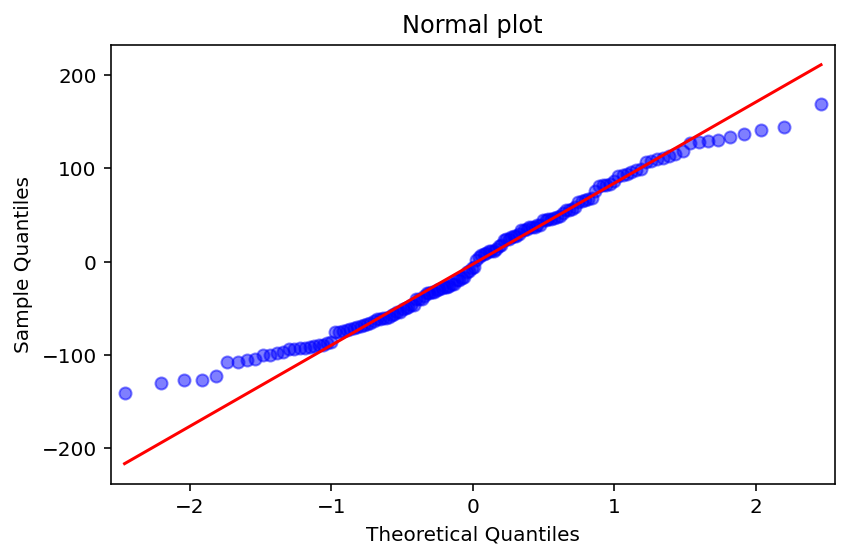

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

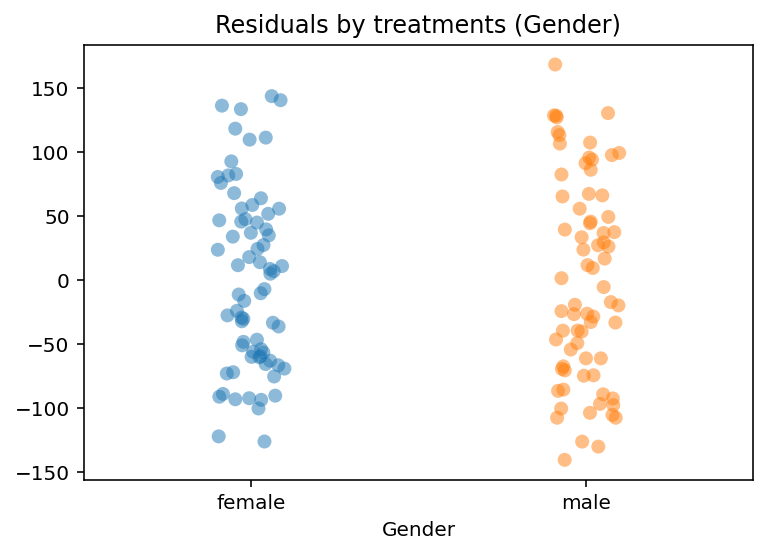

In [5]:
import seaborn as sns

sns.stripplot(x=aim_trainer_data['Gender'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Gender)')
pass;

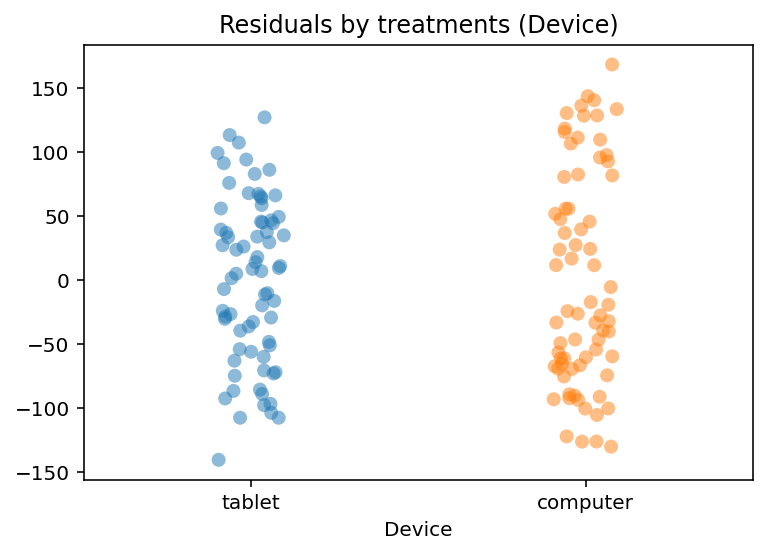

In [6]:
import seaborn as sns

sns.stripplot(x=aim_trainer_data['Device'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Device)')
pass;

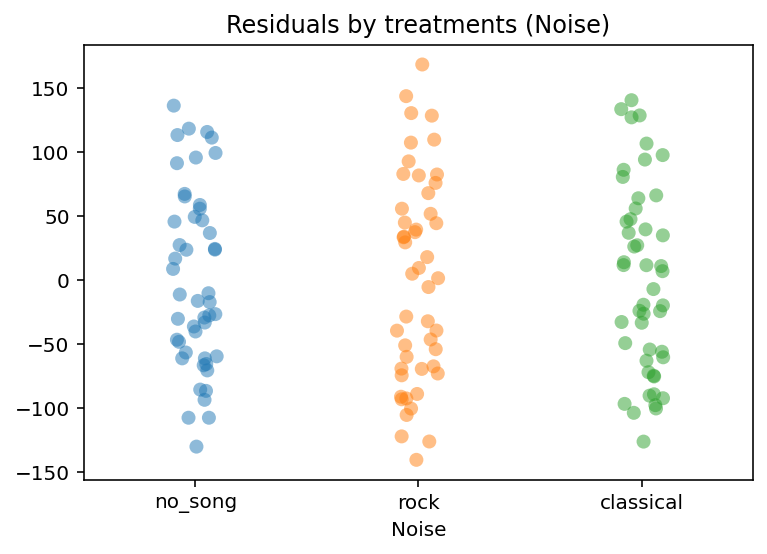

In [7]:
import seaborn as sns

sns.stripplot(x=aim_trainer_data['Noise'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Noise)')
pass;

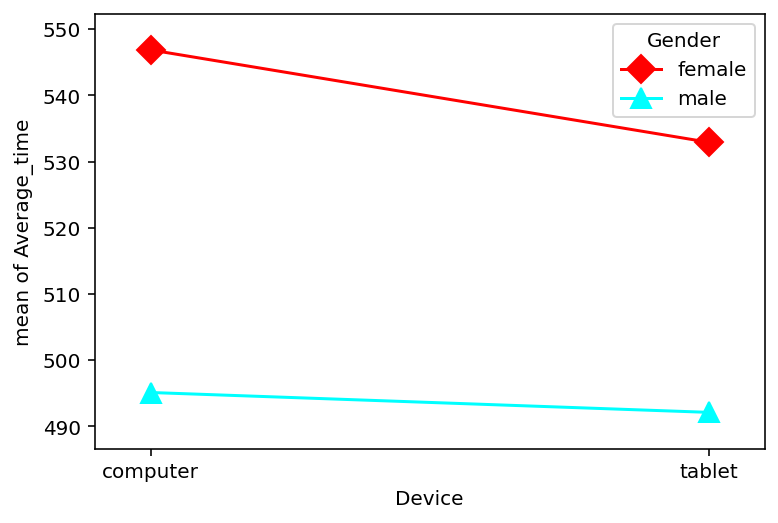

In [8]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(aim_trainer_data.Device, 
                       aim_trainer_data.Gender, 
                       aim_trainer_data.Average_time, 
                       markers=['D','^'], ms=10)

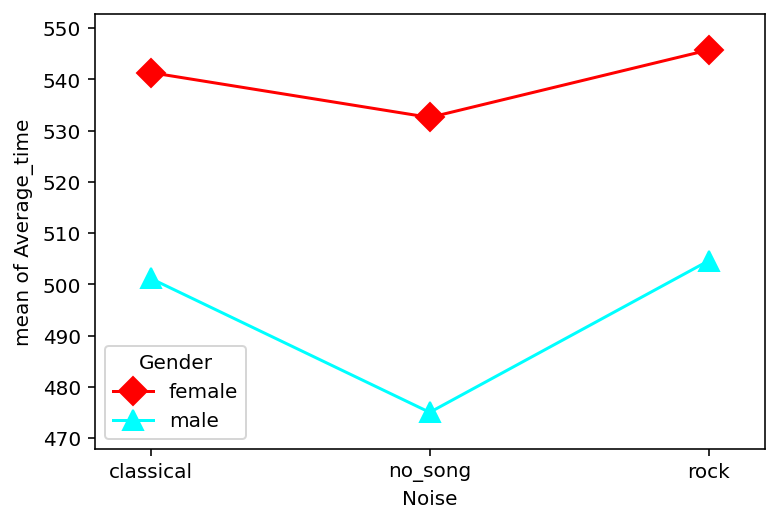

In [9]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(aim_trainer_data.Noise, 
                       aim_trainer_data.Gender, 
                       aim_trainer_data.Average_time, 
                       markers=['D','^'], ms=10)

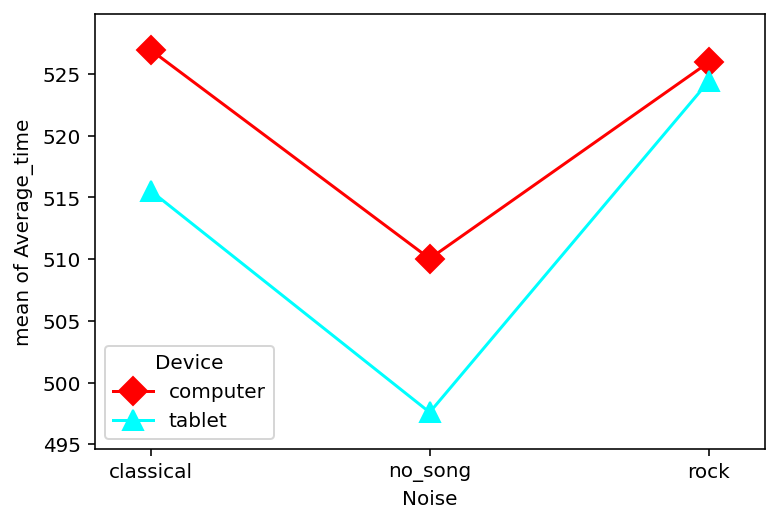

In [10]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(aim_trainer_data.Noise, 
                       aim_trainer_data.Device, 
                       aim_trainer_data.Average_time, 
                       markers=['D','^'], ms=10)

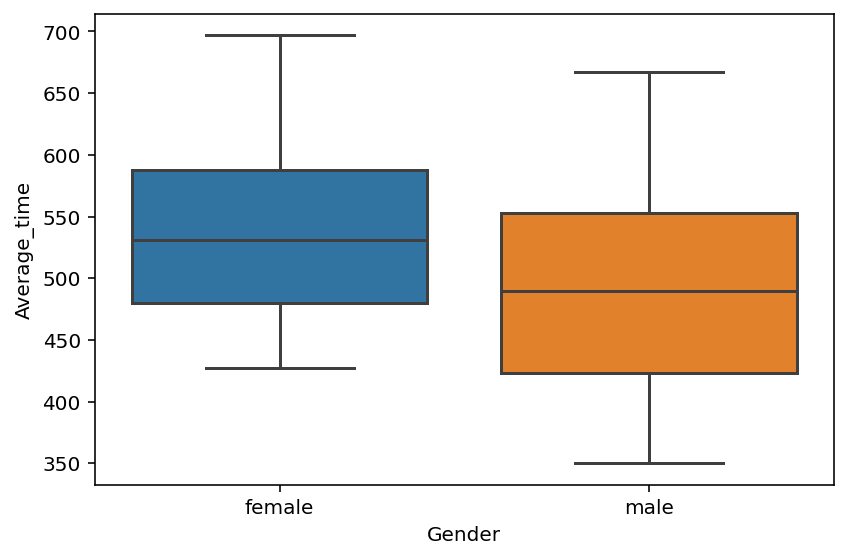

In [14]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,4));
sns.boxplot(x='Gender',y='Average_time',data=aim_trainer_data)
plt.tight_layout()
pass;